<a href="https://colab.research.google.com/github/farhanzibran/Bike-Rental-Analysis/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Farhan Zibran]
- **Email:** [farhanzibran00@gmail.com]
- **ID Dicoding:** [farhan_zibran]

## Menentukan Pertanyaan Bisnis

- bagaimana pengaruh season (musim) dan cuaca (suhu, kelembapan, dan kecepatan angin) terhadap jumlah total penyewaan sepeda per hari (cnt)?
- Bagaimana pola penyewaan sepeda berbeda antara hari kerja dan akhir pekan?

## Import Semua Packages/Library yang Digunakan

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [52]:
day_df = pd.read_csv('https://raw.githubusercontent.com/farhanzibran/Bike-Rental-Analysis/refs/heads/main/Dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [53]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/farhanzibran/Bike-Rental-Analysis/refs/heads/main/Dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataset ini terkait dengan log historis dua tahun yang mencakup tahun 2011 dan 2012
- kedua tabel sebenarnya sama saja, tetapi yang membedakan adalah pada tabel hour karena adanya kolom hr

### Assessing Data

### Menilai Tabel Day

In [54]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [55]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [56]:
print('Jumlah duplikasi: ', day_df.duplicated().sum())

Jumlah duplikasi:  0


In [57]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


### Menilai Tabel hour

In [58]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [59]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [60]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [61]:
hour_df.duplicated().sum()

0

In [62]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


**Insight:**
- **Tabel Day_df** Tidak ada data yang missing, Duplicate, Dan inaccurate, tetapi ada salah satu type data yang salah yaitu dteday
- **Tabel hour_df** Tidak ada data yang missing, Duplicate, Dan inaccurate, tetapi ada salah satu type data yang salah yaitu dteday

### Cleaning Data

**Mengganti Type data dteday pada tabel day_df**

In [63]:
datetime_columns = ["dteday"]
for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])

In [64]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [65]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Mengganti Type data pada tabel hour_df**

In [66]:
datetime_columns = ["dteday"]
for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])

In [67]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [68]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- pada tabel day_df, type data untuk waktu sudah diubah menjadi date
- pada tabel hour_df, type data untuk waktu sudah diubah menjadi date

### **Menggabungkan Data Day_df & Hour_df**

In [69]:
merged_df = pd.merge(hour_df, day_df[['dteday', 'season', 'yr', 'holiday', 'workingday']], on='dteday', how='left')


In [70]:
print(merged_df.head())

   instant     dteday  season_x  yr_x  mnth  hr  holiday_x  weekday  \
0        1 2011-01-01         1     0     1   0          0        6   
1        2 2011-01-01         1     0     1   1          0        6   
2        3 2011-01-01         1     0     1   2          0        6   
3        4 2011-01-01         1     0     1   3          0        6   
4        5 2011-01-01         1     0     1   4          0        6   

   workingday_x  weathersit  ...   atemp   hum  windspeed  casual  registered  \
0             0           1  ...  0.2879  0.81        0.0       3          13   
1             0           1  ...  0.2727  0.80        0.0       8          32   
2             0           1  ...  0.2727  0.80        0.0       5          27   
3             0           1  ...  0.2879  0.75        0.0       3          10   
4             0           1  ...  0.2879  0.75        0.0       0           1   

   cnt  season_y  yr_y  holiday_y  workingday_y  
0   16         1     0          0   

In [71]:
merged_df.head()

,instant,dteday,season_x,yr_x,mnth,hr,holiday_x,weekday,workingday_x,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,season_y,yr_y,holiday_y,workingday_y
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,0.2879,0.81,0.0,3,13,16,1,0,0,0
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,0.2727,0.80,0.0,8,32,40,1,0,0,0
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,0.2727,0.80,0.0,5,27,32,1,0,0,0
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,0.2879,0.75,0.0,3,10,13,1,0,0,0
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,0.2879,0.75,0.0,0,1,1,1,0,0,0


## Exploratory Data Analysis (EDA)

### Explore day_df

In [72]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
702,703,2012-12-03,4,1,12,0,1,1,1,0.452500,0.455796,0.767500,0.082721,555,5679,6234
622,623,2012-09-14,3,1,9,0,5,1,1,0.633333,0.594083,0.672500,0.103863,1379,6630,8009
216,217,2011-08-05,3,0,8,0,5,1,1,0.710833,0.656567,0.630833,0.184696,1023,3843,4866
630,631,2012-09-22,3,1,9,0,6,0,1,0.650000,0.610488,0.646667,0.283583,2512,5883,8395
171,172,2011-06-21,3,0,6,0,2,1,2,0.680833,0.637646,0.770417,0.171025,774,4061,4835


In [73]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


Dataset mencakup data dua tahun penuh 2011-2012 dengan rata-rata total penyewaan sepeda harian 4.504 unit, didominasi oleh pengguna terdaftar atau registered sebesar 3.656 dibandingkan pengguna casual sebesar 848 per hari. Mayoritas hari adalah hari kerja atau working day sebesar 68,4%, dan penyewaan lebih banyak terjadi saat cuaca baik, dengan suhu rata-rata 0,495 (dalam skala normalisasi). Kelembapan relatif tinggi (0,627), sementara kecepatan angin cenderung ringan (0,190). Strategi bisnis dapat difokuskan pada menarik lebih banyak pengguna terdaftar dan memaksimalkan penyewaan di hari kerja.

**1. Rata-rata Penyewaan Berdasarkan Musim dan Hari Kerja**

In [74]:
# Mengganti nilai 'workingday' sesuai dengan jenis hari
day_df['workingday'] = day_df['workingday'].replace({0: 'Hari Libur', 1: 'Hari Kerja'})

# Mengganti nilai 'season' sesuai dengan musim
day_df['season'] = day_df['season'].replace({1: 'Musim Semi', 2: 'Musim Panas', 3: 'Musim Gugur', 4: 'Musim Dingin'})

# Membuat pivot table berdasarkan musim dan jenis hari (workingday)
pivot_season_workingday = day_df.groupby(['season', 'workingday'])['cnt'].mean().unstack()

# Menampilkan pivot table
print(pivot_season_workingday)

workingday     Hari Kerja   Hari Libur
season                                
Musim Dingin  4785.611570  4606.210526
Musim Gugur   5718.114504  5474.666667
Musim Panas   4926.664062  5142.428571
Musim Semi    2780.541667  2257.098361


1.   Musim panas dan musim gugur cenderung memiliki rata-rata penyewaan tertinggi, baik pada hari kerja maupun libur
2.   Penyewaan sepeda menurun drastis selama musim semi, baik pada hari kerja maupun hari libur



**2. Rata-rata Penyewaan Berdasarkan Hari dalam Seminggu dan Kondisi Cuaca**

In [75]:
# Mengganti nilai weekday dengan nama hari
day_df['weekday'] = day_df['weekday'].replace({
    0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis', 4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'
})

# Mengganti nilai weathersit dengan deskripsi cuaca
day_df['weathersit'] = day_df['weathersit'].replace({
    1: 'Cerah', 2: 'Sedikit Berawan', 3: 'Hujan'
})

# Membuat pivot table lagi
pivot_weekday_weather = day_df.groupby(['weekday', 'weathersit'], observed=False)['cnt'].mean().unstack()

# Menampilkan pivot table
print(pivot_weekday_weather)


weathersit        Cerah        Hujan  Sedikit Berawan
weekday                                              
Jumat       5014.925373  1383.333333      4271.911765
Kamis       5334.328125  1472.142857      3677.151515
Minggu      4975.880597  2012.500000      4010.970588
Rabu        4989.903226  2887.500000      3899.605263
Sabtu       5078.682540          NaN      4093.487805
Selasa      4485.651515  1393.500000      4234.135135
Senin       4348.472973  1027.000000      4040.433333


1.   Hari kerja weekday = 1-5 memiliki penyewaan tertinggi dalam kondisi cuaca
cerah.
2.   Pada hari akhir pekan Sabtu dan Minggu, rata-rata penyewaan tetap tinggi meskipun kondisi cuaca sedikit buruk

**3. Rata-rata Penyewaan casual dan Registered Berdasarkan Bulan**

In [76]:
pivot_month_user = day_df.groupby('mnth')[['casual', 'registered']].mean()
print(pivot_month_user)

           casual   registered
mnth                          
1      194.225806  1982.112903
2      262.508772  2392.789474
3      716.838710  2975.419355
4     1013.366667  3471.533333
5     1214.274194  4135.500000
6     1231.766667  4540.600000
7     1260.596774  4303.080645
8     1161.919355  4502.500000
9     1172.050000  4594.466667
10     963.870968  4235.354839
11     610.050000  3637.133333
12     349.887097  3053.919355




1.   Penyewa casual meningkat drastis pada bulan Juni, Juli, Agustus, dan september, menandakan tren musiman terkait rekreasi.
2.   Penyewa terdaftar cenderung stabil sepanjang tahun, meskipun mengalami sedikit penurunan selama bulan Desember, Januari, dan Februari
3.  Bulan dengan penyewaan tertinggi untuk penyewa casual dan Registered adalah bulan September, yang kemungkinan besar memiliki kombinasi cuaca yang baik dan aktivitas yang tinggi.



**4. Rata-rata Penyewaan Berdasarkan Musim dan Kondisi Cuaca**

In [77]:
pivot_season_weather = day_df.groupby(['season', 'weathersit'])['cnt'].mean().unstack()
print(pivot_season_weather)

weathersit          Cerah    Hujan  Sedikit Berawan
season                                             
Musim Dingin  5043.563107  1961.60      4654.000000
Musim Gugur   5878.257353  2751.75      5222.479167
Musim Panas   5548.548673  1169.00      4236.705882
Musim Semi    2811.135135   934.75      2357.166667




1.   Cuaca buruk pada saat hujan  berdampak signifikan terhadap penurunan penyewaan sepeda, terutama pada musim panas dan musim semi.
2.   Cuaca cerah pada saat musim gugur mendorong penyewaan tertinggi, dengan rata-rata penyewaan jauh lebih tinggi dibandingkan musim lainnya.



**5. Rata-rata Penyewaan Berdasarkan Hari Kerja dan Jenis Pengguna**

In [78]:
pivot_workingday_user = day_df.groupby('workingday')[['casual', 'registered']].mean()
print(pivot_workingday_user)

                 casual   registered
workingday                          
Hari Kerja   606.570000  3978.250000
Hari Libur  1371.134199  2959.034632




1.   Penyewa kasual cenderung lebih aktif pada hari libur, mengindikasikan penggunaan sepeda untuk rekreasi.
2.   Penyewa terdaftar atau registered lebih konsisten menggunakan sepeda pada hari kerja, menunjukkan bahwa pengguna terdaftar kemungkinan besar menggunakan sepeda sebagai sarana transportasi untuk bekerja atau sekolah.



**6. Total Penyewaan Berdasarkan Tahun dan Bulan**

In [79]:
pivot_year_month = day_df.groupby(['yr', 'mnth'])['cnt'].sum().unstack()
print(pivot_year_month)

mnth     1       2       3       4       5       6       7       8       9   \
yr                                                                            
0     38189   48215   64045   94870  135821  143512  141341  136691  127418   
1     96744  103137  164875  174224  195865  202830  203607  214503  218573   

mnth      10      11      12  
yr                            
0     123511  102167   87323  
1     198841  152664  123713  




1.   Total penyewaan pada tahun 2012 (yr = 1) lebih tinggi dibandingkan tahun 2011 (yr = 0), menunjukkan peningkatan popularitas sepeda sewa.
2.   Bulan-bulan  di kedua tahun (Juni, Juli, Agustus) mencatatkan penyewaan tertinggi secara total.
3.   Total penyewaan cenderung rendah pada bulan Januari dan Februari di kedua tahun, mengindikasikan pengaruh cuaca dingin terhadap penggunaan sepeda.



## Explore hour_df

In [80]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1386,1387,2011-03-03,1,0,3,1,0,4,1,1,0.24,0.1970,0.30,0.4627,0,1,1
16583,16584,2012-11-28,4,1,11,17,0,3,1,1,0.34,0.3333,0.31,0.1343,17,546,563
12358,12359,2012-06-04,2,1,6,3,0,1,1,2,0.56,0.5303,0.60,0.1642,0,5,5
10654,10655,2012-03-25,2,1,3,1,0,0,0,2,0.42,0.4242,1.00,0.2537,24,65,89
1024,1025,2011-02-15,1,0,2,9,0,2,1,1,0.22,0.1970,0.29,0.4478,2,108,110


In [81]:
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


Dataset hour_df mencatat data penyewaan sepeda berdasarkan jam untuk dua tahun (2011-2012), menunjukkan rata-rata total penyewaan sebesar 189,46 sepeda per jam, dengan pengguna terdaftar mendominasi (153,79 sepeda/jam) dibandingkan pengguna kasual (35,68 sepeda/jam). Penyewaan tertinggi mencapai 977 sepeda/jam, terutama oleh pengguna terdaftar. Tren penyewaan cenderung lebih tinggi pada hari kerja, sementara pengguna kasual lebih aktif pada hari libur. Cuaca memiliki pengaruh signifikan, di mana kondisi cuaca baik (weathersit = 1) dan suhu hangat mendorong peningkatan penyewaan, sementara kelembapan tinggi dan angin kencang cenderung menurunkan permintaan. Dataset ini juga menunjukkan distribusi penyewaan merata sepanjang tahun dan waktu, memungkinkan analisis lebih lanjut untuk mengidentifikasi pola berdasarkan musim, bulan, hari, atau jam.

**Pola Penyewaan berdasarkan Jam**

In [82]:
hourly_pattern = hour_df.groupby('hr')[['casual', 'registered', 'cnt']].mean()
print(hourly_pattern)

       casual  registered         cnt
hr                                   
0   10.158402   43.739669   53.898072
1    6.504144   26.871547   33.375691
2    4.772028   18.097902   22.869930
3    2.715925    9.011478   11.727403
4    1.253945    5.098996    6.352941
5    1.411437   18.478382   19.889819
6    4.161379   71.882759   76.044138
7   11.055021  201.009629  212.064649
8   21.679505  337.331499  359.011004
9   30.891334  188.418157  219.309491
10  46.477304  127.191197  173.668501
11  59.540578  148.602476  208.143054
12  68.293956  185.021978  253.315934
13  72.308642  181.352538  253.661180
14  75.567901  165.381344  240.949246
15  74.905350  176.327846  251.233196
16  73.745205  238.238356  311.983562
17  74.273973  387.178082  461.452055
18  61.120879  364.390110  425.510989
19  48.770604  262.752747  311.523352
20  36.233516  189.796703  226.030220
21  28.255495  144.059066  172.314560
22  22.252747  109.082418  131.335165
23  15.199176   72.631868   87.831044




1.   Jam sibuk untuk pengguna registered, biasanya pagi dan sore
2.   Jam sibuk untuk pengguna casual,siang atau sore



**Pola penyewaan berdasarkan hari dalam seminggu**

In [83]:
weekday_pattern = hour_df.groupby('weekday')[['casual', 'registered', 'cnt']].mean()
print(weekday_pattern)

            casual  registered         cnt
weekday                                   
0        56.163469  121.305356  177.468825
1        28.553449  155.191206  183.744655
2        23.580514  167.658377  191.238891
3        23.159192  167.971313  191.130505
4        24.872521  171.564144  196.436665
5        31.458786  164.677121  196.135907
6        61.246815  128.962978  190.209793




1.   Hari kerja memiliki jumlah penyewaan tinggi untuk pengguna registered
2.   Akhir pekan lebih di dimonasi oleh pengguna casual



**pengaruh cuaca terhadap penyewaan**

In [84]:
weather_pattern = hour_df.groupby('weathersit')[['casual', 'registered', 'cnt']].mean()
print(weather_pattern)

               casual  registered         cnt
weathersit                                   
1           40.545431  164.323841  204.869272
2           29.595290  145.570202  175.165493
3           16.055673   95.523608  111.579281
4            2.666667   71.666667   74.333333




1.   cuaca kurang mendukung menurun jumlah penyewaan secara signifikan yaitu 3 & 4
2.   penyewaan tertinggi terjadi pada saat cuaca baik yaitu w=1



**Pola penyewaan berdasarkan musim**

In [85]:
season_pattern = hour_df.groupby('season')[['casual', 'registered', 'cnt']].mean()
print(season_pattern)

           casual  registered         cnt
season                                   
1       14.290901   96.823668  111.114569
2       46.160581  162.183488  208.344069
3       50.287144  185.729093  236.016237
4       30.666824  168.202032  198.868856




1.   Musim panas dan musim gugur cenderung memiliki penyewaan tertinggi (3 & 4)
2.   Musim semi menunjukkan penyewaan menurun



**Pola penyewaan berdasarkan hari kerja dan hari libur**

In [86]:
workingday_pattern = hour_df.groupby('workingday')[['casual', 'registered', 'cnt']].mean()
print(workingday_pattern)

               casual  registered         cnt
workingday                                   
0           57.441422  123.963910  181.405332
1           25.561315  167.646439  193.207754




1.   Hari kerja mendukung lebih banyak penyewaan registered
2.   Hari libur didominasi oleh pengguna casual



**Pola penyewaan berdasarkan bulan**

In [87]:
monthly_pattern = hour_df.groupby('mnth')[['casual', 'registered', 'cnt']].mean()
print(monthly_pattern)


         casual  registered         cnt
mnth                                   
1      8.426872   85.997901   94.424773
2     11.158091  101.706935  112.865026
3     30.172437  125.238289  155.410726
4     42.311761  144.949200  187.260960
5     50.594758  172.312500  222.907258
6     51.323611  189.191667  240.515278
7     52.524866  179.295027  231.819892
8     48.840000  189.257627  238.097627
9     48.937370  191.835769  240.773138
10    41.185389  180.973122  222.158511
11    25.471816  151.863605  177.335421
12    14.627782  127.675657  142.303439




1.   Bulan juni-agustus mencatatkan penyewaan tertinggi
2.   Bulan Desember-Februari mencatatkan penyewaan terendah



**Pola Penyewaan berdasarkan tahun**

In [88]:
yearly_pattern = hour_df.groupby('yr')[['casual', 'registered', 'cnt']].sum()
print(yearly_pattern)


    casual  registered      cnt
yr                             
0   247252      995851  1243103
1   372765     1676811  2049576


Peningkatan total penyewaan dari tahun 2011 ke 2012, mencerminkan popularitas layanan yang meningkat.

**Distribusi penyewaan berdasarkan suhu**

In [89]:
temp_pattern = hour_df.groupby(pd.cut(hour_df['temp'], bins=5), observed=False)[['casual', 'registered', 'cnt']].mean()
print(temp_pattern)


                   casual  registered         cnt
temp                                             
(0.019, 0.216]   3.241121   61.828037   65.069159
(0.216, 0.412]  13.747433  109.319395  123.066828
(0.412, 0.608]  36.033223  158.637874  194.671096
(0.608, 0.804]  58.454350  202.240929  260.695279
(0.804, 1.0]    83.053597  243.222849  326.276446


suhu hangat cenderung meningkatkan penyewaan,terutama untuk pengguna registered


**Insight:**
- Musim panas dan musim gugur adalah periode dengan penggunaan sepeda tertinggi,
Hari kerja mendukung penyewaan oleh pengguna terdaftar, sedangkan hari libur menarik lebih banyak pengguna kasual,
Cuaca buruk secara konsisten menurunkan tingkat penyewaan, terutama bagi pengguna kasual.
- Penyewaan sepeda menunjukkan pola yang berbeda antara pengguna terdaftar dan kasual. Pengguna terdaftar cenderung memanfaatkan sepeda pada jam sibuk hari kerja, sedangkan pengguna kasual lebih aktif di siang atau sore hari, terutama pada akhir pekan dan hari libur. Penyewaan meningkat pada musim panas dan gugur, dengan suhu hangat menjadi faktor pendukung utama, sementara cuaca buruk dan musim dingin menurunkan permintaan. Peningkatan signifikan dalam penyewaan dari tahun 2011 ke 2012 menunjukkan popularitas layanan yang terus bertumbuh. Strategi promosi dan operasional dapat difokuskan pada musim, cuaca, dan waktu tertentu untuk memaksimalkan penggunaan layanan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: bagaimana pengaruh season (musim) dan cuaca (suhu, kelembapan, dan kecepatan angin) terhadap jumlah total penyewaan sepeda per hari (cnt)?



**Analisis 1: Pengaruh Musim terhadap Jumlah Penyewaan Sepeda**

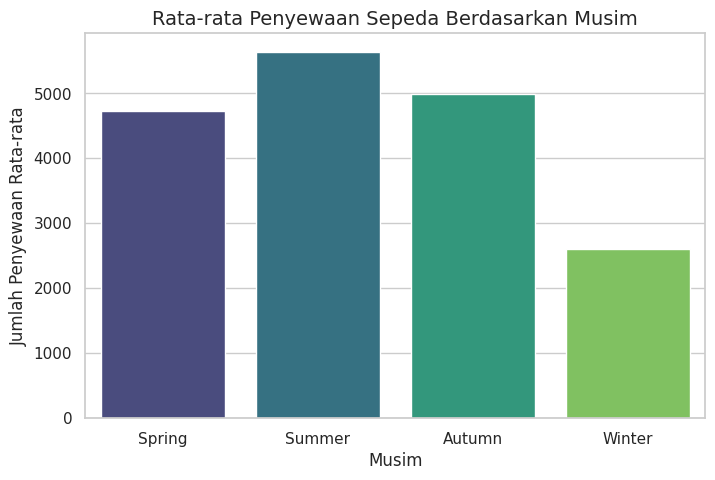

In [90]:
# Mengatur gaya visualisasi
sns.set_theme(style="whitegrid")

# Agregasi data berdasarkan musim (season) untuk day_df
season_group = day_df.groupby('season')['cnt'].mean().reset_index()
season_labels = ['Spring', 'Summer', 'Autumn', 'Winter']

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='cnt', hue='season', data=season_group, palette="viridis", dodge=False)
plt.xticks(ticks=[0, 1, 2, 3], labels=season_labels)
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim", fontsize=14)
plt.xlabel("Musim", fontsize=12)
plt.ylabel("Jumlah Penyewaan Rata-rata", fontsize=12)
plt.legend([], [], frameon=False)  # Menghilangkan legend jika tidak diperlukan
plt.show()




**Perbandingan Penyewa Kasual vs Terdaftar Berdasarkan Kondisi Cuaca**

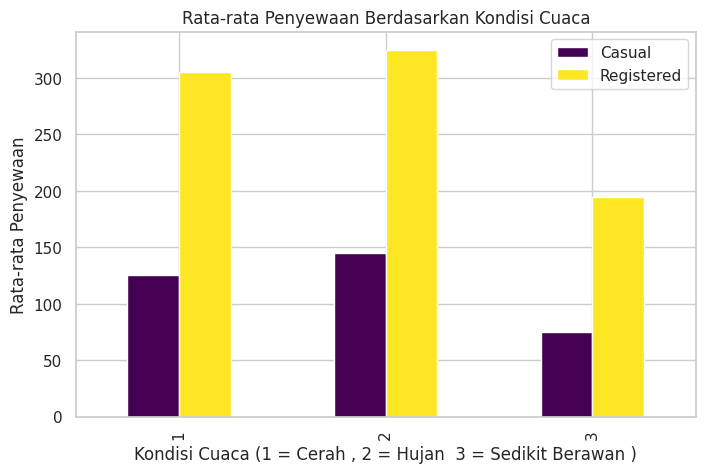

In [97]:
weather_group.plot(kind='bar', figsize=(8, 5), colormap='viridis')
plt.title('Rata-rata Penyewaan Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca (1 = Cerah , 2 = Hujan  3 = Sedikit Berawan )')
plt.ylabel('Rata-rata Penyewaan')
plt.legend(['Casual', 'Registered'])
plt.show()

**Pengaruh cuaca terhadap penyewaan sepeda**

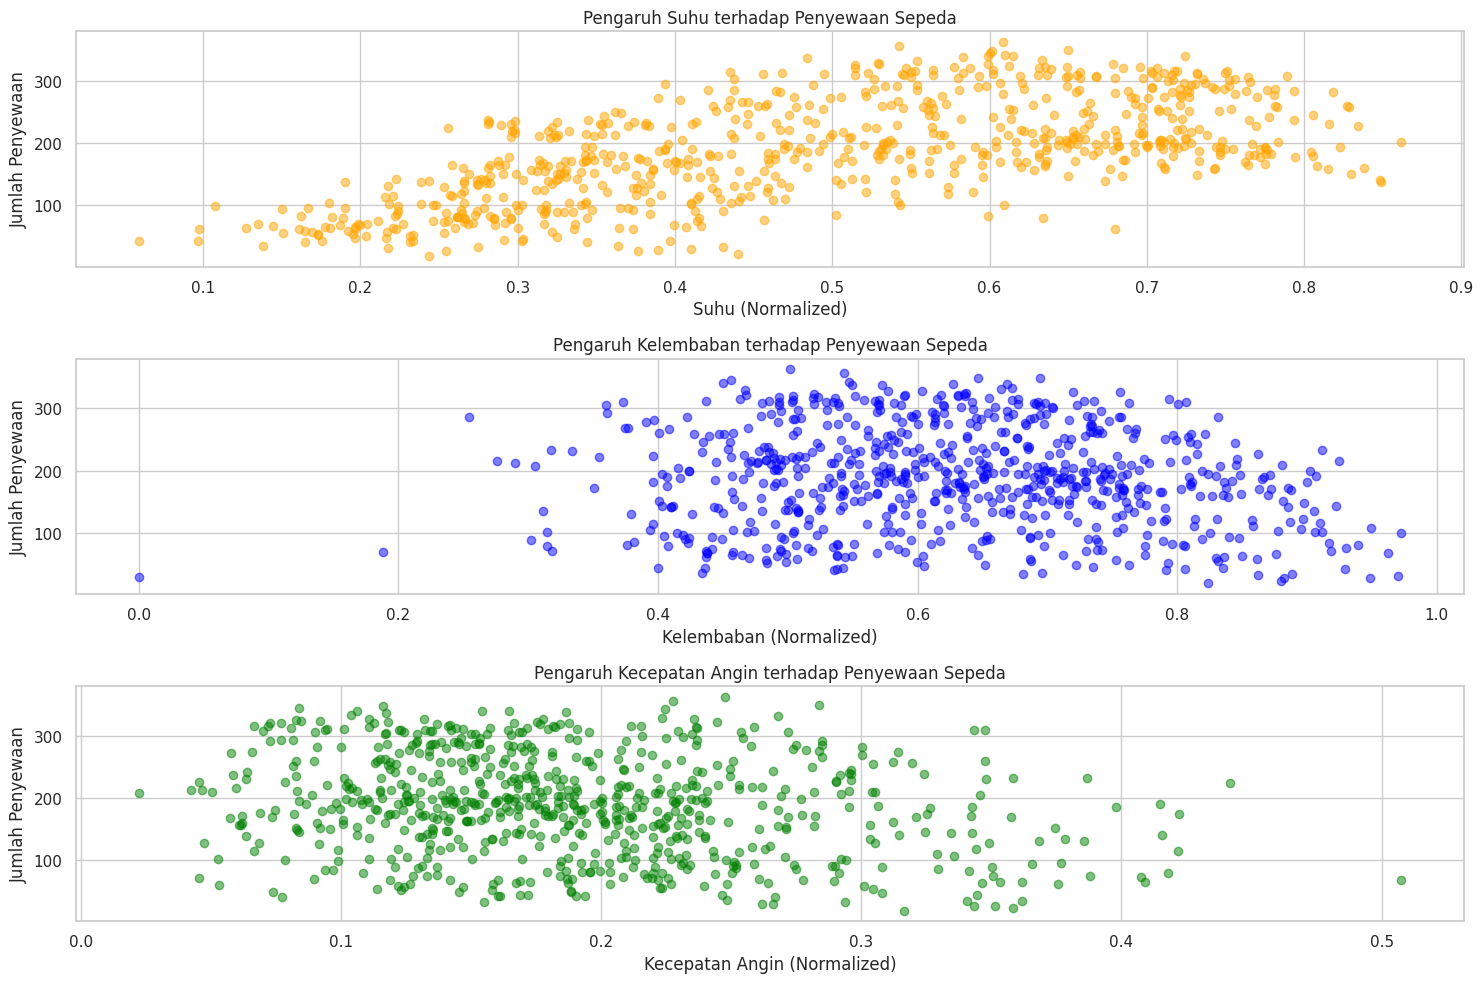

In [92]:
# Mengelompokkan data berdasarkan rata-rata harian untuk analisis pengaruh cuaca
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])  # Pastikan kolom 'dteday' dalam format datetime
weather_effect = hour_df.groupby('dteday')[['temp', 'hum', 'windspeed', 'cnt']].mean()

# Membuat plot untuk melihat pengaruh cuaca terhadap jumlah penyewaan
plt.figure(figsize=(15, 10))

# Plot untuk suhu vs jumlah penyewaan
plt.subplot(3, 1, 1)
plt.scatter(weather_effect['temp'], weather_effect['cnt'], alpha=0.5, color='orange')
plt.title('Pengaruh Suhu terhadap Penyewaan Sepeda')
plt.xlabel('Suhu (Normalized)')
plt.ylabel('Jumlah Penyewaan')

# Plot untuk kelembaban vs jumlah penyewaan
plt.subplot(3, 1, 2)
plt.scatter(weather_effect['hum'], weather_effect['cnt'], alpha=0.5, color='blue')
plt.title('Pengaruh Kelembaban terhadap Penyewaan Sepeda')
plt.xlabel('Kelembaban (Normalized)')
plt.ylabel('Jumlah Penyewaan')

# Plot untuk kecepatan angin vs jumlah penyewaan
plt.subplot(3, 1, 3)
plt.scatter(weather_effect['windspeed'], weather_effect['cnt'], alpha=0.5, color='green')
plt.title('Pengaruh Kecepatan Angin terhadap Penyewaan Sepeda')
plt.xlabel('Kecepatan Angin (Normalized)')
plt.ylabel('Jumlah Penyewaan')

# Mengatur layout agar tidak saling tumpang tindih
plt.tight_layout()
plt.show()


1. Suhu: Terdapat hubungan positif antara suhu dan jumlah penyewaan sepeda. Ketika suhu meningkat, jumlah penyewaan sepeda cenderung bertambah, terutama pada suhu yang moderat.
2. Kelembaban: Hubungan antara kelembaban dan jumlah penyewaan cenderung negatif. Kelembaban yang lebih tinggi tampaknya menurunkan jumlah penyewaan sepeda.
3. Kecepatan Angin: Tidak ada pola yang jelas antara kecepatan angin dan jumlah penyewaan sepeda, meskipun kecepatan angin yang lebih tinggi tampaknya sedikit mengurangi jumlah penyewaan.

### Pertanyaan 2: Bagaimana pola penyewaan sepeda berbeda antara hari kerja dan akhir pekan?




**Analisis 2: Pola Penyewaan Berdasarkan Jam dan Hari Kerja atau bukan**

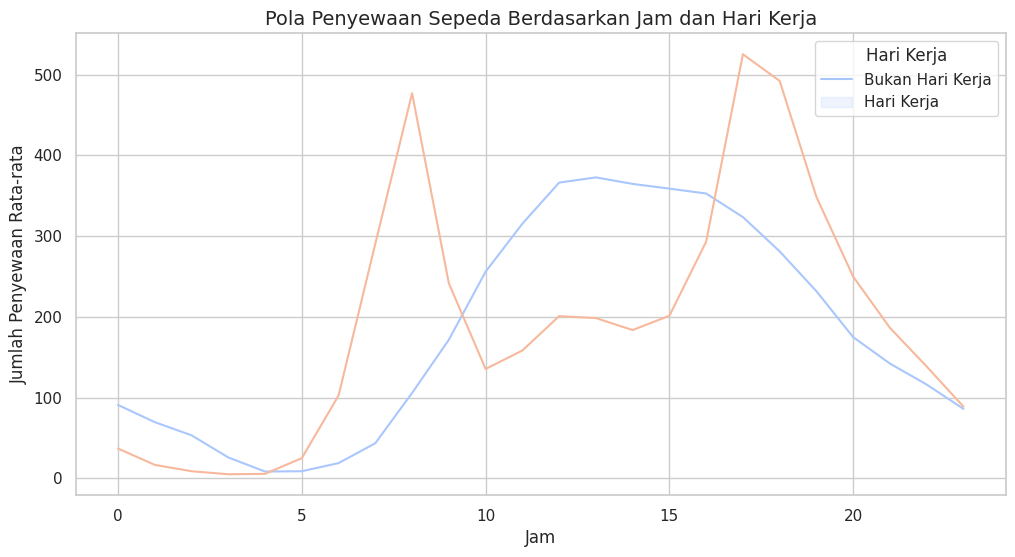

In [93]:
# Agregasi data untuk pola berdasarkan jam dan hari kerja
hour_group = hour_df.groupby(['hr', 'workingday'])['cnt'].mean().reset_index()

# Visualisasi
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_group, x='hr', y='cnt', hue='workingday', palette='coolwarm')
plt.title("Pola Penyewaan Sepeda Berdasarkan Jam dan Hari Kerja", fontsize=14)
plt.xlabel("Jam", fontsize=12)
plt.ylabel("Jumlah Penyewaan Rata-rata", fontsize=12)
plt.legend(title="Hari Kerja", labels=["Bukan Hari Kerja", "Hari Kerja"])
plt.show()

**Insight analisis 1:**
- Musim Summer (Musim Panas) memiliki rata-rata penyewaan tertinggi dibandingkan musim lainnya, menunjukkan bahwa cuaca yang hangat sangat mendukung aktivitas bersepeda.
- Musim Winter (Musim Dingin) memiliki rata-rata penyewaan terendah, kemungkinan disebabkan oleh cuaca dingin yang kurang nyaman untuk bersepeda.

**Insight analisis 2:**


1.   Pada hari kerja, puncak penyewaan terjadi pada jam 8 pagi dan 5 sore, kemungkinan besar terkait dengan perjalanan pulang-pergi kerja.
2.   Pada hari libur, pola penyewaan lebih tersebar sepanjang hari, dengan puncaknya sekitar jam siang hingga sore.
3.  Pola ini menunjukkan bahwa penggunaan sepeda pada hari kerja lebih berorientasi pada kebutuhan transportasi, sementara pada hari libur lebih untuk rekreasi.



## Analisis Lanjutan (Opsional)

Statistik Berdasarkan Waktu Penggunaan dan Grup Penyewaan:
   time_of_day rental_group  mean_rentals  total_rentals  count_hours
0        Malam       Rendah     28.524884         122657         4300
1        Malam       Sedang    175.921582         253503         1441
2        Malam       Tinggi    543.000000           1086            2
3         Pagi       Rendah     38.994359          76039         1950
4         Pagi       Sedang    234.384155         665651         2840
5         Pagi       Tinggi    626.794425         179890          287
6        Siang       Rendah     65.821277          30936          470
7        Siang       Sedang    260.792244         753168         2888
8        Siang       Tinggi    598.529617         171778          287
9         Sore       Rendah     64.765517          18782          290
10        Sore       Sedang    289.735494         554264         1913
11        Sore       Tinggi    653.902954         464925          711

Rata-rata Penyewaan Per Jam:
 

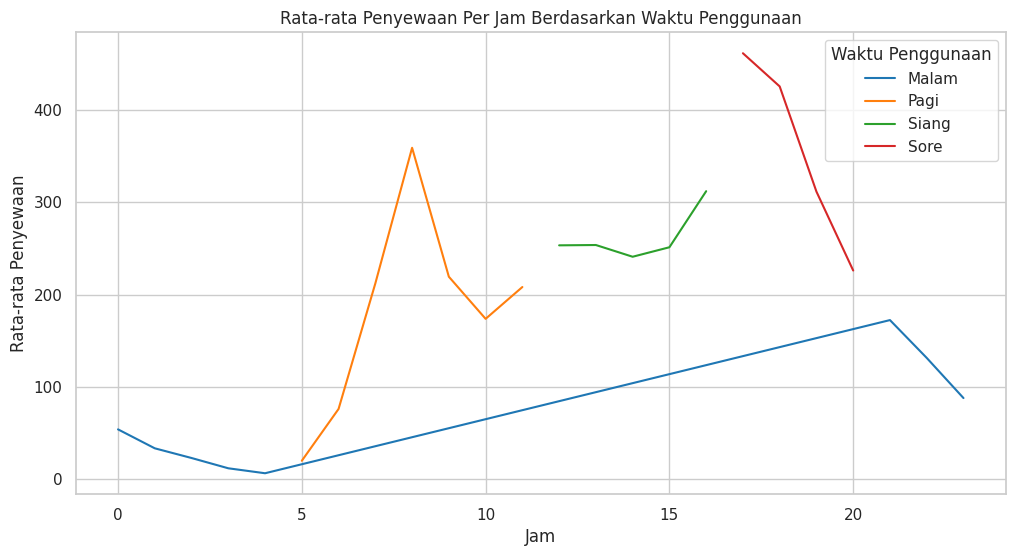

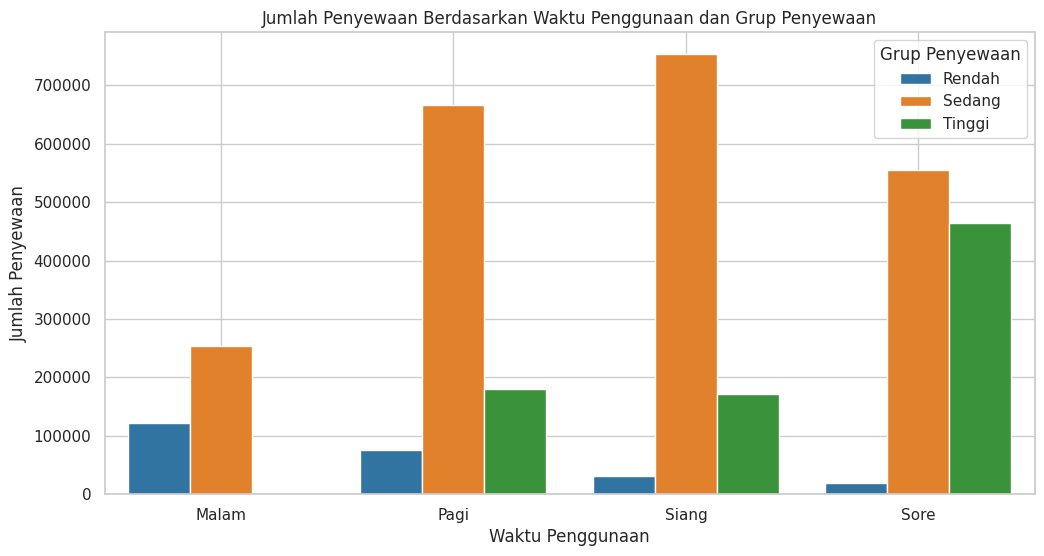

In [94]:
# Menambahkan kolom tanggal ke dalam format datetime
# Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/farhanzibran/Bike-Rental-Analysis/refs/heads/main/merged_data.csv')

# Konversi waktu menjadi datetime (jika belum)
df['dteday'] = pd.to_datetime(df['dteday'])

# **1. Klasifikasi berdasarkan waktu penggunaan**
# Tambahkan kolom 'time_of_day' berdasarkan jam
def classify_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Pagi'
    elif 12 <= hour < 17:
        return 'Siang'
    elif 17 <= hour < 21:
        return 'Sore'
    else:
        return 'Malam'

df['time_of_day'] = df['hr'].apply(classify_time_of_day)

# **2. Klasifikasi berdasarkan jumlah penyewaan**
# Kelompokkan penyewaan menjadi rendah, sedang, tinggi
def classify_rental_count(cnt):
    if cnt < 100:
        return 'Rendah'
    elif 100 <= cnt < 500:
        return 'Sedang'
    else:
        return 'Tinggi'

df['rental_group'] = df['cnt'].apply(classify_rental_count)

# **3. Statistik berdasarkan grup**
# Hitung statistik untuk setiap kombinasi grup waktu dan penyewaan
group_stats = df.groupby(['time_of_day', 'rental_group']).agg({
    'cnt': ['mean', 'sum'],
    'hr': 'count'
}).reset_index()

# Ubah nama kolom agar lebih rapi
group_stats.columns = ['time_of_day', 'rental_group', 'mean_rentals', 'total_rentals', 'count_hours']

# **4. Analisis per hari atau per jam**
# Hitung jumlah rata-rata penyewaan per jam atau per hari
hourly_stats = df.groupby(['hr', 'time_of_day']).agg({
    'cnt': 'mean',
    'registered': 'mean',
    'casual': 'mean'
}).reset_index()
hourly_stats = hourly_stats.rename(columns={
    'cnt': 'mean_total_rentals',
    'registered': 'mean_registered',
    'casual': 'mean_casual'
})

# **5. Cetak hasil analisis**
print("Statistik Berdasarkan Waktu Penggunaan dan Grup Penyewaan:")
print(group_stats)

print("\nRata-rata Penyewaan Per Jam:")
print(hourly_stats)

# **6. Visualisasi**
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribusi rata-rata penyewaan per jam berdasarkan waktu penggunaan
plt.figure(figsize=(12, 6))
sns.lineplot(data=hourly_stats, x='hr', y='mean_total_rentals', hue='time_of_day', palette='tab10')
plt.title('Rata-rata Penyewaan Per Jam Berdasarkan Waktu Penggunaan')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.legend(title='Waktu Penggunaan')
plt.grid(True)
plt.show()

# Plot jumlah penyewaan per grup waktu dan grup penyewaan
plt.figure(figsize=(12, 6))
sns.barplot(data=group_stats, x='time_of_day', y='total_rentals', hue='rental_group', palette='tab10')
plt.title('Jumlah Penyewaan Berdasarkan Waktu Penggunaan dan Grup Penyewaan')
plt.xlabel('Waktu Penggunaan')
plt.ylabel('Jumlah Penyewaan')
plt.legend(title='Grup Penyewaan')
plt.grid(True)
plt.show()


**Insight**
1. Pagi memiliki aktivitas penyewaan tertinggi dari pengguna terdaftar, sedangkan Siang dan sore lebih didominasi oleh pengguna kasual.
2. Grup penyewaan menunjukkan bahwa kelompok "Tinggi" cenderung terjadi pada sore dan malam hari.
3. Pola penyewaan harian menunjukkan puncak aktivitas pada jam tertentu



## Conclusion

**Conclution pertanyaan 1**
Berdasarkan data pada tabel day_df, ditemukan bahwa jumlah penyewaan sepeda tertinggi terjadi pada musim panas, diikuti oleh musim gugur. Sebaliknya, musim dingin memiliki jumlah penyewaan paling rendah. Faktor cuaca yang lebih hangat dan cerah pada musim panas dan gugur tampaknya mendorong lebih banyak aktivitas luar ruang, termasuk penggunaan sepeda. Hal ini menunjukkan bahwa layanan sepeda sangat dipengaruhi oleh kondisi musiman. Sebagai langkah strategis, perusahaan dapat memanfaatkan musim panas dan gugur untuk meningkatkan promosi layanan sepeda, sementara pada musim dingin, insentif seperti diskon atau kampanye khusus dapat diberikan untuk mendorong pengguna tetap aktif.

**Conclution pertanyaan 2**
Berdasarkan data pada tabel hour_df, ditemukan bahwa puncak penyewaan sepeda terjadi pada pagi hari (07:00-09:00) dan sore hari (17:00-19:00). Pola ini terutama didominasi oleh pengguna terdaftar atau registered, yang kemungkinan besar menggunakan sepeda untuk perjalanan kerja. Sebaliknya, pengguna kasual lebih sering menyewa sepeda pada siang hari (10:00-16:00), yang menunjukkan pola penggunaan untuk keperluan rekreasi. Dengan wawasan ini, perusahaan dapat mengoptimalkan alokasi sepeda dan fokus pada pemeliharaan selama jam sibuk untuk mendukung pengguna terdaftar. Selain itu, promosi khusus seperti paket rekreasi atau diskon siang hari dapat dilakukan untuk meningkatkan jumlah penyewaan oleh pengguna kasual.

In [ ]:
#merged_df.to_csv("merged_data.csv", index=False)